# Assignment Week 1 - Group 5

### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
filename = "../fraudTrain.csv"

fraud_df = pd.read_csv(filename)

#fraud_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [28]:
print(fraud_df.shape)

(1296675, 23)


### Boxplot of Amount

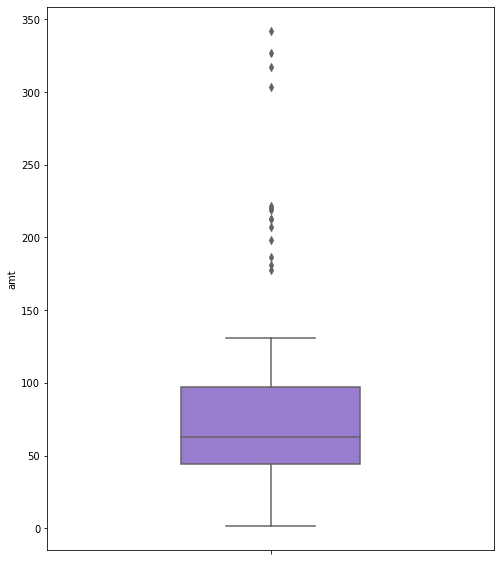

In [29]:
plt.figure(figsize=(8,10))
sns.boxplot(y='amt', data=fraud_df.head(100), width = 0.4, color= 'mediumpurple')

### Boxplots of Amount by Gender

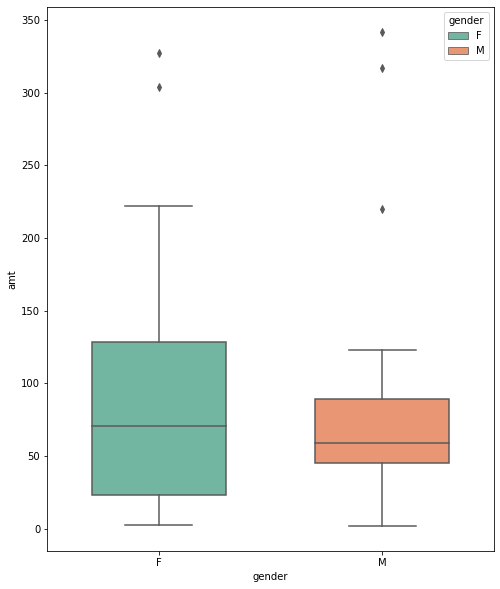

In [30]:
gender_amt = pd.DataFrame(fraud_df.head(100), columns = ['amt', 'gender'])

plt.figure(figsize=(8,10))
sns.boxplot(y='amt', x='gender', data=gender_amt, hue='gender', dodge=False, width = 0.6, palette= 'Set2')

### Distribution of User's Age

In [31]:
# To parse all datetime columns in advance
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'], errors='coerce')

now = pd.to_datetime('now')

# Create a new column age
fraud_df['age']=(now.year - fraud_df['dob'].dt.year) - ((now.month - fraud_df['dob'].dt.month) < 0)

#fraud_df['age']

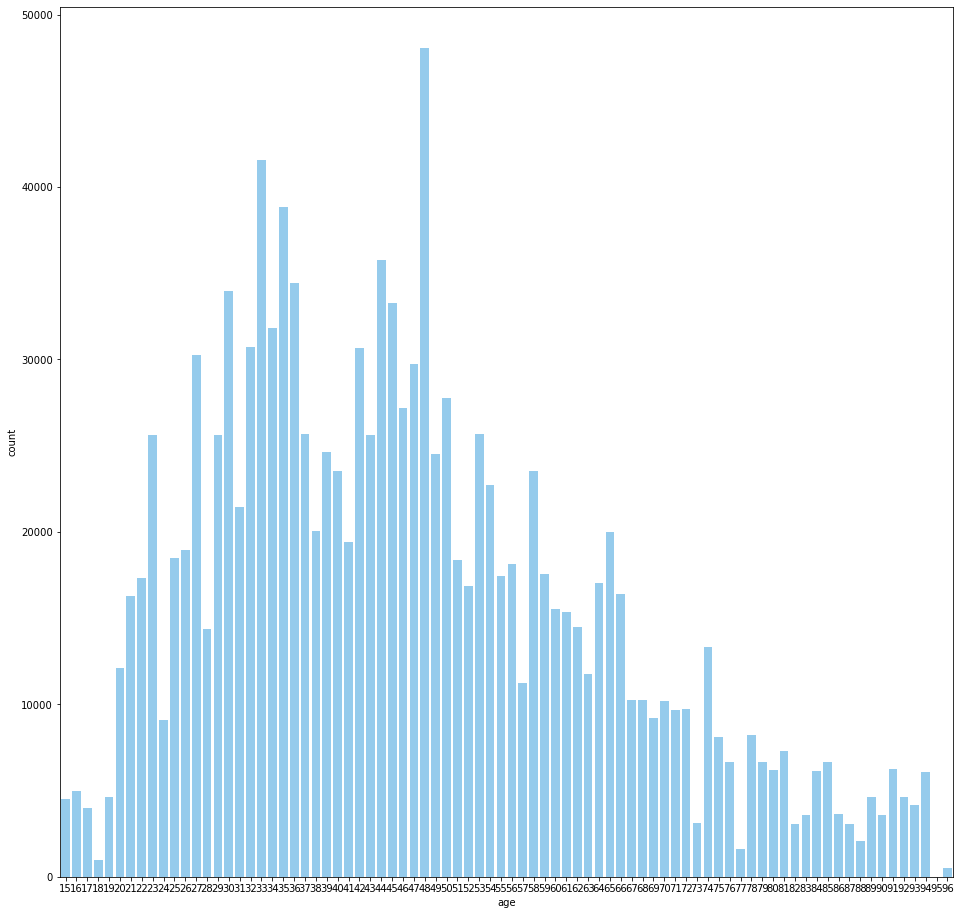

In [32]:
plt.figure(figsize=(16,16))
sns.countplot(x= 'age',data=fraud_df, color = 'lightskyblue')

### Category Count

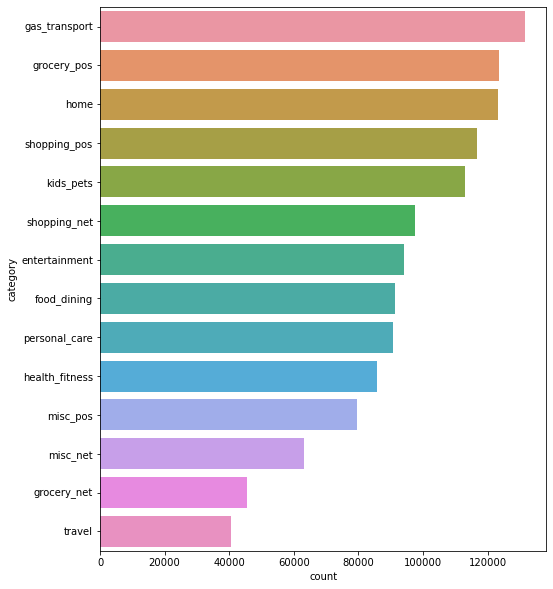

In [33]:
plt.figure(figsize=(8,10))
sns.countplot(y="category", data=fraud_df, order= fraud_df['category'].value_counts().index)

### Amount by Category Pie Chart

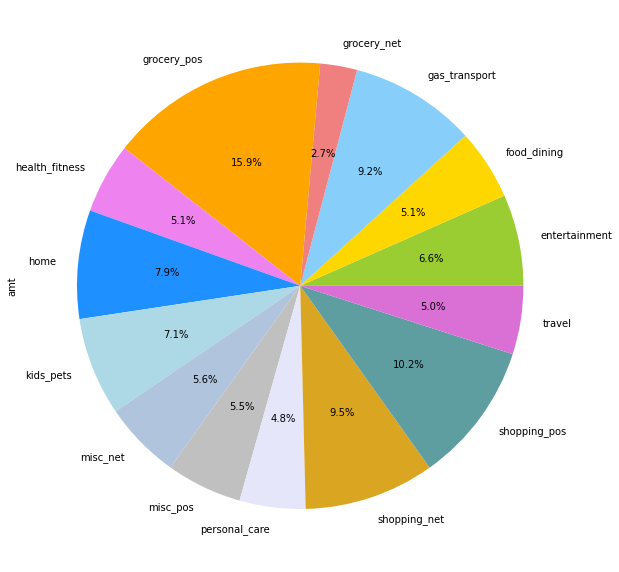

In [73]:
cs = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','orange','violet',
        'dodgerblue', 'lightblue','lightsteelblue','silver', 'lavender','goldenrod',
        'cadetblue','orchid']
#from matplotlib import cm
#cs=cm.Set2(np.arange(8)/8)
category_amt = fraud_df.groupby("category")["amt"].sum()
category_amt.plot.pie(autopct="%.1f%%", colors=cs, figsize=(10, 12))

### Volume by Gender Pie Chart

Text(0, 0.5, 'Volume')

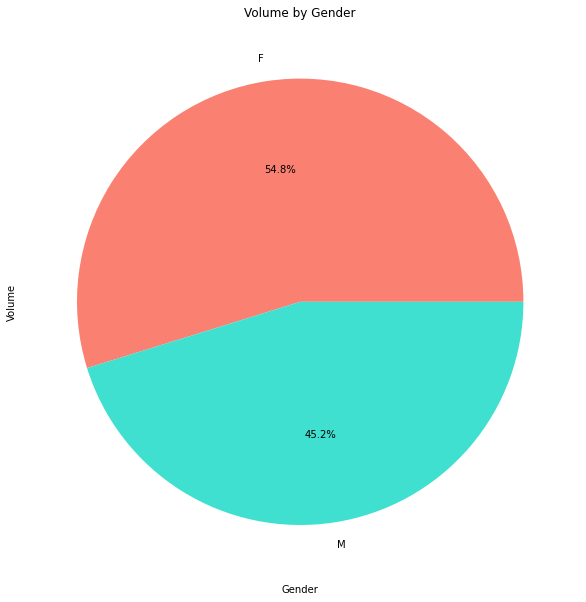

In [37]:
plt = pd.value_counts(fraud_df.head(1000)['gender']).plot.pie(figsize=(10, 12), 
      autopct='%1.1f%%', title="Volume by Gender", colors= ['salmon','turquoise'])
plt.set_xlabel('Gender')
plt.set_ylabel('Volume')